practica en la Clase 24/04/24

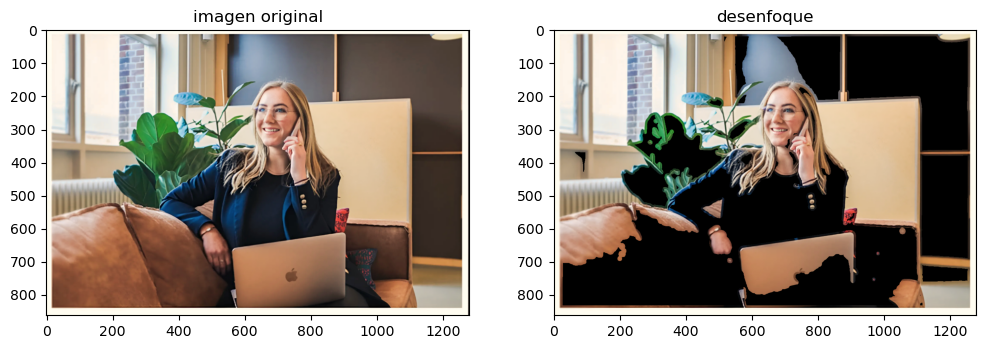

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imgAtratar.png')  

imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

umbral_valor = 127  
_, imagen_binaria = cv2.threshold(imagen_gris, umbral_valor, 255, cv2.THRESH_BINARY)
imagen_binaria_suavizada = cv2.GaussianBlur(imagen_binaria, (15, 15), 0)
mascara = np.zeros_like(imagen)
mascara[imagen_binaria_suavizada != 0] = imagen[imagen_binaria_suavizada != 0]

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('imagen original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(mascara, cv2.COLOR_BGR2RGB))
plt.title('desenfoque')

plt.show()


In [3]:
import cv2
import numpy as np

# Cargar la imagen original
imagen_original = cv2.imread('girl.jpg')

# Aplicar desenfoque gaussiano
desenfoque = cv2.GaussianBlur(imagen_original, (21, 21), 0)

# Reducir la resolución
escala = 0.5  # Factor de escalado (puedes ajustarlo según tus necesidades)
ancho = int(desenfoque.shape[1] * escala)
alto = int(desenfoque.shape[0] * escala)
dimension = (ancho, alto)
imagen_reducida = cv2.resize(desenfoque, dimension, interpolation=cv2.INTER_AREA)

# Mostrar la imagen resultante
cv2.imshow('Imagen Resultante', imagen_reducida)
cv2.waitKey(0)
cv2.destroyAllWindows()